# Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import joblib

Numpy : NumPy is a very popular python library for large multi-dimensional array and matrix processing, with the help of a large collection of high-level mathematical functions. It is very useful for fundamental scientific computations in Machine Learning.

Sklearn : Scikit-learn is one of the most popular ML libraries for classical ML algorithms. It is built on top of two basic Python libraries, viz., NumPy and SciPy. Scikit-learn supports most of the supervised and unsupervised learning algorithms. Scikit-learn can also be used for data-mining and data-analysis, which makes it a great tool who is starting out with ML. 

Pandas : Pandas is a popular Python library for data analysis. It is not directly related to Machine Learning. As we know that the dataset must be prepared before training. In this case, Pandas comes handy as it was developed specifically for data extraction and preparation. It provides high-level data structures and wide variety tools for data analysis. It provides many inbuilt methods for groping, combining and filtering data.

Matplotlib : Matplotlib is a very popular Python library for data visualization. Like Pandas, it is not directly related to Machine Learning. It particularly comes in handy when a programmer wants to visualize the patterns in the data. It is a 2D plotting library used for creating 2D graphs and plots.

Seaborn : Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.

# Loading Data into DataFrame

In [29]:
df=pd.read_csv("data/car data.csv")

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
#train,test=train_test_split(df,test_size=0.3,random_state=0)
#test.to_csv("data/test_input.csv",index=False)

# This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

name : Name of Cars

year : Year of the car when it was bought

selling_price : Price at which the car is being sold

km_driven : Number of Kilometres the car is driven

fuel : Fuel type of car (petrol / diesel / CNG / LPG / electric)

seller_type : Tells if a Seller is Individual or a Dealer

transmission : Gear transmission of the car (Automatic/Manual)

Owner : Number of previous owners of the car.

In [32]:
df.shape

(301, 9)

# Checking Unique Values

In [33]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


# Checking missing values

In [34]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [35]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Removing Car Name as it will not be useful in doing predictions

In [47]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

# Feature Engineering

In [48]:
final_dataset["Current Year"]=2022

In [49]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [50]:
final_dataset["Years_Old"]=final_dataset["Current Year"]-final_dataset["Year"]

In [51]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Years_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [52]:
final_dataset.drop("Year",axis=1,inplace=True)

In [53]:
final_dataset.drop("Current Year",axis=1, inplace=True)

In [54]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [62]:
final_dataset["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [66]:
final_dataset["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [67]:
final_dataset["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

# Generating One Hot Encoding features for categorical variables

In [68]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(drop="first",sparse=False)
onehotencoder.fit(final_dataset[["Fuel_Type","Seller_Type","Transmission"]])
final_data=onehotencoder.transform(final_dataset[["Fuel_Type","Seller_Type","Transmission"]])

In [70]:
final_data=pd.DataFrame(final_data,columns=["Fuel_Type_Diesel","Fuel_Type_Petrol","Seller_Type_Individual","Transmission_Manual"])

In [71]:
final_data.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0


In [72]:
final_dataset=pd.concat([final_dataset.drop(["Fuel_Type","Seller_Type","Transmission"],axis=1),final_data],axis=1)

In [75]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0.0,1.0,0.0,1.0
1,4.75,9.54,43000,0,9,1.0,0.0,0.0,1.0
2,7.25,9.85,6900,0,5,0.0,1.0,0.0,1.0
3,2.85,4.15,5200,0,11,0.0,1.0,0.0,1.0
4,4.60,6.87,42450,0,8,1.0,0.0,0.0,1.0


# Generating Correlation Matrix and Visualizations

In [76]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years_Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

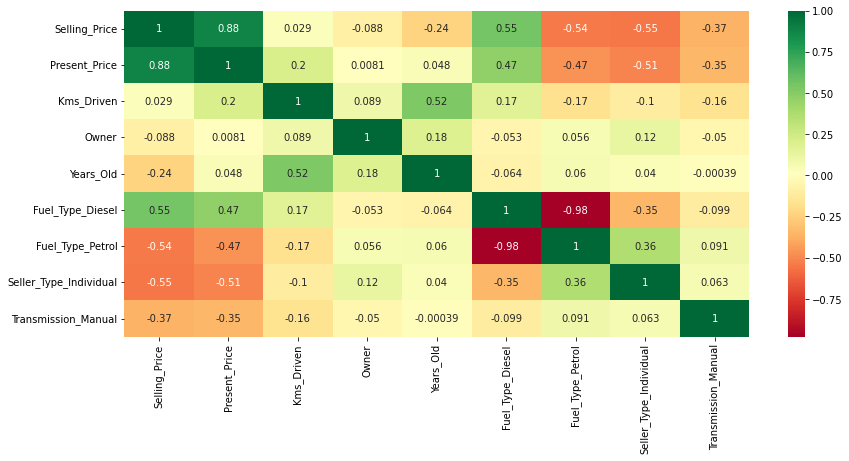

In [77]:
plt.figure(figsize=(14,6))
sns.heatmap(final_dataset.corr(),annot=True,cmap="RdYlGn")

In [78]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [79]:
X.head()

,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0.0,1.0,0.0,1.0
1,9.54,43000,0,9,1.0,0.0,0.0,1.0
2,9.85,6900,0,5,0.0,1.0,0.0,1.0
3,4.15,5200,0,11,0.0,1.0,0.0,1.0
4,6.87,42450,0,8,1.0,0.0,0.0,1.0


In [80]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [81]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [82]:
print(model.feature_importances_)

[0.3845972  0.0411492  0.00082506 0.07676271 0.22544045 0.01056225
 0.1240064  0.13665672]


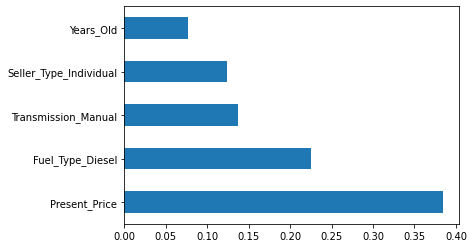

In [83]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Train Test Split

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [85]:
df_train=pd.concat([X_train,y_train],axis=1).to_csv("data/train.csv")

In [86]:
df_test=pd.concat([X_test,y_test],axis=1).to_csv("data/test.csv")

# Feature Scaling

In [87]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0.0,1.0,0.0,1.0
1,4.75,9.54,43000,0,9,1.0,0.0,0.0,1.0
2,7.25,9.85,6900,0,5,0.0,1.0,0.0,1.0
3,2.85,4.15,5200,0,11,0.0,1.0,0.0,1.0
4,4.60,6.87,42450,0,8,1.0,0.0,0.0,1.0


In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler=StandardScaler()

In [90]:
scaler.fit(X_train)

StandardScaler()

In [91]:
X_train_new=scaler.transform(X_train)

In [92]:
X_test_new=scaler.transform(X_test)

In [93]:
type(X_train_new)

numpy.ndarray

In [94]:
X_train_new

array([[-0.00227191,  0.93964891, -0.14917483, ..., -2.0302589 ,
        -0.76088591,  0.37590471],
       [ 0.45595473, -0.69259787, -0.14917483, ...,  0.49254802,
        -0.76088591,  0.37590471],
       [-0.53796068,  0.2823926 , -0.14917483, ...,  0.49254802,
        -0.76088591,  0.37590471],
       ...,
       [-0.62415093, -0.57390545, -0.14917483, ...,  0.49254802,
         1.31425748,  0.37590471],
       [-0.37867237,  0.63918345, -0.14917483, ...,  0.49254802,
        -0.76088591,  0.37590471],
       [-0.76161892, -0.58104126, -0.14917483, ...,  0.49254802,
         1.31425748,  0.37590471]])

In [95]:
type(X_test_new)

numpy.ndarray

In [96]:
X_test_new

array([[ 0.19411094,  0.55310171, -0.14917483, -0.49604261,  2.09394732,
        -2.0302589 , -0.76088591,  0.37590471],
       [-0.74132602, -0.7641939 , -0.14917483,  0.86564299, -0.47756693,
         0.49254802,  1.31425748,  0.37590471],
       [-0.20956492, -0.31991793, -0.14917483, -0.49604261, -0.47756693,
         0.49254802, -0.76088591,  0.37590471],
       [ 0.43413442, -0.09846974, -0.14917483, -0.83646402,  2.09394732,
        -2.0302589 , -0.76088591,  0.37590471],
       [ 1.32549434, -0.55011939, -0.14917483, -1.17688542,  2.09394732,
        -2.0302589 , -0.76088591, -2.66024869],
       [-0.18010749, -0.77370832, -0.14917483, -0.83646402, -0.47756693,
         0.49254802, -0.76088591,  0.37590471],
       [-0.09064419, -0.07439825, -0.14917483,  0.52522159, -0.47756693,
         0.49254802, -0.76088591,  0.37590471],
       [-0.77143806, -0.88312418, -0.14917483, -0.83646402, -0.47756693,
         0.49254802,  1.31425748,  0.37590471],
       [-0.09064419, -0.14575642

In [97]:
X_train=pd.DataFrame(X_train_new,columns=X_train.columns)

In [98]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.002272,0.939649,-0.149175,-0.155621,2.093947,-2.030259,-0.760886,0.375905
1,0.455955,-0.692598,-0.149175,-0.836464,-0.477567,0.492548,-0.760886,0.375905
2,-0.537961,0.282393,-0.149175,0.525222,-0.477567,0.492548,-0.760886,0.375905
3,0.194111,0.781900,-0.149175,0.525222,2.093947,-2.030259,-0.760886,0.375905
4,-0.769256,-0.312259,3.766664,0.525222,-0.477567,0.492548,1.314257,0.375905


In [99]:
X_test=pd.DataFrame(X_test_new,columns=X_test.columns)

In [100]:
X_test.head()

,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.194111,0.553102,-0.149175,-0.496043,2.093947,-2.030259,-0.760886,0.375905
1,-0.741326,-0.764194,-0.149175,0.865643,-0.477567,0.492548,1.314257,0.375905
2,-0.209565,-0.319918,-0.149175,-0.496043,-0.477567,0.492548,-0.760886,0.375905
3,0.434134,-0.098470,-0.149175,-0.836464,2.093947,-2.030259,-0.760886,0.375905
4,1.325494,-0.550119,-0.149175,-1.176885,2.093947,-2.030259,-0.760886,-2.660249


# Training Models

In [101]:
lr=LinearRegression(n_jobs=-1)

In [102]:
lr.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [103]:
rf=RandomForestRegressor()

In [104]:
rf.fit(X_train,y_train)

RandomForestRegressor()

# K-Fold Cross Validation

Cross-validation is a statistical method used to estimate the skill of machine learning models.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem

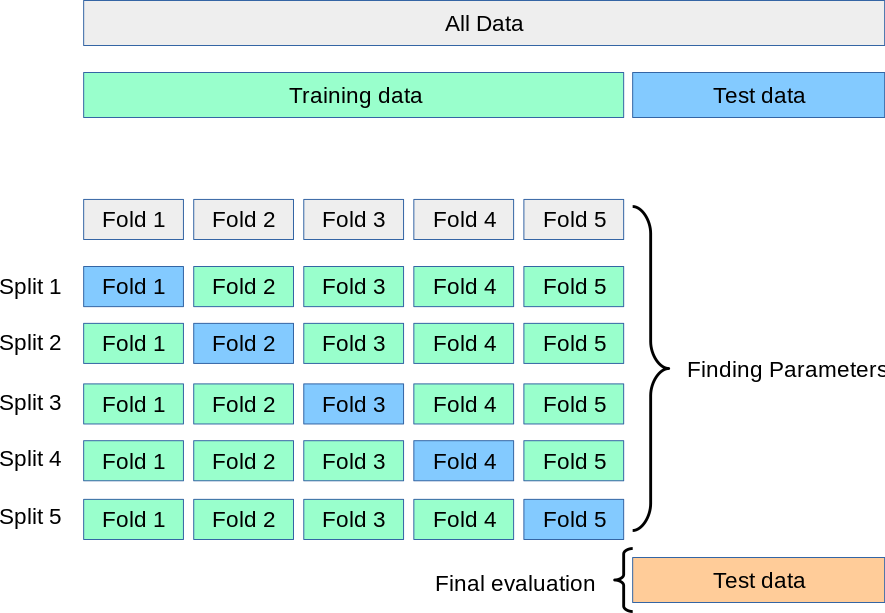

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
scores_lr=cross_val_score(lr,X_train,y_train,cv=4)

In [107]:
scores_lr

array([0.85490207, 0.91829316, 0.68490559, 0.89503137])

In [108]:
scores_lr.mean()

0.8382830477100311

In [109]:
scores_rf=cross_val_score(rf,X_train,y_train,cv=4)

In [110]:
scores_rf

array([0.97517698, 0.80357698, 0.66976679, 0.94704665])

In [111]:
scores_rf.mean()

0.8488918479538017

# Hyper Parameter Tuning

Hyper parameter tuning (optimization) is an essential aspect of machine learning process. A good choice of hyperparameters can really make a model succeed in meeting desired metric value or on the contrary it can lead to a unending cycle of continuous training and optimization.

# Difference Between Grid Search and Randomised Search

Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried.

By contrast, Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.



In [112]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [113]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [114]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [115]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [116]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 5, verbose=5, random_state=42, n_jobs = -1)

In [117]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=5)

In [118]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [119]:
rf_random.best_score_

-3.5906606927899793

In [120]:
predictions=rf_random.predict(X_test)

C:\Users\Aniket thani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

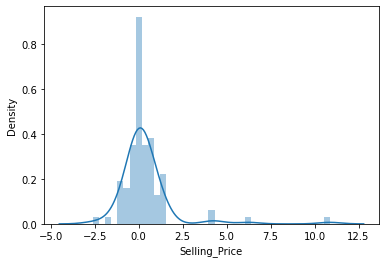

In [121]:
sns.distplot(y_test-predictions)

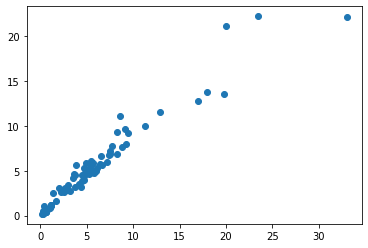

In [122]:
plt.scatter(y_test,predictions)

In [123]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7587018310657595
MSE: 2.590941840090046
RMSE: 1.6096402828240992


# Serializing The Models

What is Serialization and Deserialization ?
Serialization is the process of translating data structures or object state into a format that can be stored (for example, in a file or memory buffer) or transmitted and reconstructed later.
In serialization, an object is transformed into a format that can be stored, so as to be able to deserialize it later and recreate the original object from the serialized format in the context of data storage.
There are a few ways to put trained machine learning (ML) models into production. The most common method is to serialize the model using some particular format after training, and deserialize that model in the production environment.

In [124]:
joblib.dump(rf_random,"models/rf.joblib")

['models/rf.joblib']

In [125]:
joblib.dump(scaler,"models/scaler.joblib")

['models/scaler.joblib']

In [126]:
joblib.dump(onehotencoder,"models/onehotencoder.joblib")

['models/onehotencoder.joblib']